In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
car = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ch6/car_evaluation.csv")

In [ ]:
car.head()

,buying_price,maintenance_cost,doors,persons,lug_boot,safety,condition
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
for col in car.columns:
  print(car[col].value_counts())

vhigh    432
high     432
med      432
low      432
Name: buying_price, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maintenance_cost, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: condition, dtype: int64


In [ ]:
X = car.drop(['condition'], axis=1)
y = car.condition

In [ ]:
car.columns

Index(['buying_price', 'maintenance_cost', 'doors', 'persons', 'lug_boot',
       'safety', 'condition'],
      dtype='object')

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 513 kB/s 


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['buying_price', 'maintenance_cost', 
                                 'doors', 'persons', 'lug_boot','safety'])
X = encoder.fit_transform(X)

In [ ]:
X.head()

,buying_price,maintenance_cost,doors,persons,lug_boot,safety
0,1,1,1,1,1,1
1,1,1,1,1,1,2
2,1,1,1,1,1,3
3,1,1,1,1,2,1
4,1,1,1,1,2,2


# Train Test Split w/ Stratification

In [ ]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.33, 
                                                random_state=42, stratify=y)

# Decision Tree Classifier w/ Gini Criterion

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf_gini = DecisionTreeClassifier(max_depth=4)
clf_gini.fit(xTrain, yTrain)
y_pred_gini = clf_gini.predict(xTest)
clf_gini.score(xTest, yTest)

0.8493870402802102

# Visualize DT

[Text(0.25, 0.9, 'X[5] <= 1.5\ngini = 0.458\nsamples = 1157\nvalue = [257, 46, 810, 44]'),
 Text(0.125, 0.7, 'gini = 0.0\nsamples = 394\nvalue = [0, 0, 394, 0]'),
 Text(0.375, 0.7, 'X[3] <= 1.5\ngini = 0.582\nsamples = 763\nvalue = [257, 46, 416, 44]'),
 Text(0.25, 0.5, 'gini = 0.0\nsamples = 250\nvalue = [0, 0, 250, 0]'),
 Text(0.5, 0.5, 'X[0] <= 2.5\ngini = 0.629\nsamples = 513\nvalue = [257, 46, 166, 44]'),
 Text(0.25, 0.3, 'X[1] <= 2.5\ngini = 0.499\nsamples = 261\nvalue = [126, 0, 135, 0]'),
 Text(0.125, 0.1, 'gini = 0.316\nsamples = 127\nvalue = [25, 0, 102, 0]'),
 Text(0.375, 0.1, 'gini = 0.371\nsamples = 134\nvalue = [101, 0, 33, 0]'),
 Text(0.75, 0.3, 'X[1] <= 2.5\ngini = 0.651\nsamples = 252\nvalue = [131, 46, 31, 44]'),
 Text(0.625, 0.1, 'gini = 0.401\nsamples = 123\nvalue = [92, 0, 23, 8]'),
 Text(0.875, 0.1, 'gini = 0.7\nsamples = 129\nvalue = [39, 46, 8, 36]')]

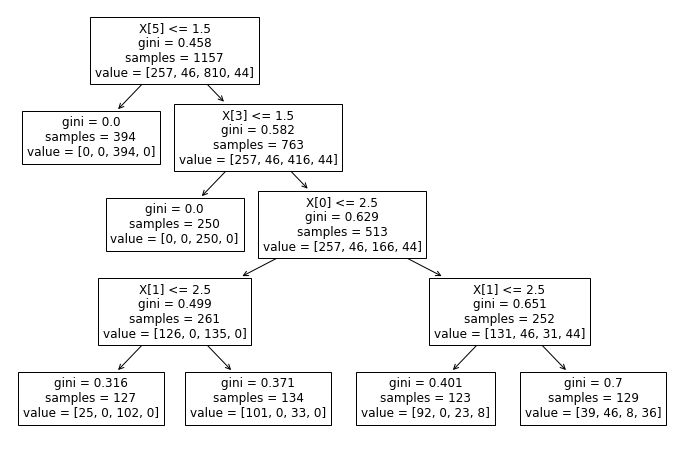

In [ ]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(xTrain, yTrain))

In [ ]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [ ]:
clf_en.fit(xTrain, yTrain)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [ ]:
y_pred_en = clf_en.predict(xTest)
clf_en.score(xTest, yTest)

0.8458844133099825

In [ ]:
clf_en.score(xTrain, yTrain)

1.0

### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yTest, y_pred_gini)
print(" Confusion Matrix \n", cm)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(yTest, y_pred_en))

In [ ]:
print(classification_report(yTest, y_pred_gini))